In [11]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Подготовительная часть задания

In [12]:
# Загрузить ДФ
path = '/Users/vladislavkravchenko/Desktop/WORK_IT/1.Elbrus_Bootcamp/2.Phase0/4.Thursday/rent_real_estate/_data.csv'
df = pd.read_csv(path)
# df = pd.read_csv('_data.csv')
pd.set_option('display.max_columns', None)

In [80]:
df.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [14]:
# Выбор рабочих колонок, анализ которых позволяет провести графическую аналитику
df.rename(columns={'ID  объявления': 'ID объявления'}, inplace=True)
wdf = df[['Unnamed: 0',
    'ID объявления',  
   'Количество комнат', 
   'Метро', 
   'Площадь, м2', 
   'Дом', 
   'Парковка', 
   'Цена', 
   'Ремонт', 
   'Балкон', 
   'Окна', 
   'Санузел', 
   'Можно с детьми/животными',  
   'Высота потолков, м', 
   'Лифт', 
   'Мусоропровод']].copy()

In [15]:
# Замена нулевых значений
wdf.fillna(0, inplace=True)
wdf.isnull().sum()

Unnamed: 0                  0
ID объявления               0
Количество комнат           0
Метро                       0
Площадь, м2                 0
Дом                         0
Парковка                    0
Цена                        0
Ремонт                      0
Балкон                      0
Окна                        0
Санузел                     0
Можно с детьми/животными    0
Высота потолков, м          0
Лифт                        0
Мусоропровод                0
dtype: int64

In [16]:
# Шэйп ДФ для сверки результатов
wdf.shape

(23368, 16)

## Основная часть задания

### Колонка: Количество комнат. 
Задача: привести к типу int()

In [17]:
# Сплит по знаку запятой и взять только числа.
wdf = wdf.copy()
wdf['Количество комнат'] = wdf['Количество комнат'].apply(lambda x: int(x.split(',')[0]) if type(x) != int else int(x))

In [18]:
wdf['Количество комнат'].value_counts()

Количество комнат
2    8466
1    7931
3    4262
4    1163
0    1041
5     367
6     138
Name: count, dtype: int64

In [19]:
# Проверка, что все значения численные
all(wdf['Количество комнат'].to_list()) == int()

True

### Колонка: Метро. 
Задача: оставить только название станции

In [20]:
wdf['Метро'] = wdf['Метро'].apply(lambda x: x.split() if type(x) == str else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x[1] if type(x) == list else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Мира' if x == "Проспект" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Академика Янгеля' if x == "Улица" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Рокоссовского' if x == "Бульвар" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' стадион' if x == "Водный" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Черемушки' if x == "Новые" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' вокзал' if x == "Речной" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' победы' if x == "Парк" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Ильича' if x == "Площадь" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' роща' if x == "Марьина" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' проспект' if x == "Нахимовский" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' котлы' if x == "Верхние" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' проспект' if x == "Рязанский" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' стан' if x == "Теплый" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' проспект' if x == "Ленинский" else x)
wdf['Метро'].value_counts()


Метро
0                         1315
Проспект Мира              644
Улица Академика Янгеля     409
Селигерская                393
Щелковская                 313
                          ... 
Нахабино                     1
Театральная                  1
Зенит                        1
Яхромская                    1
Волковская                   1
Name: count, Length: 309, dtype: int64

### Колонка: Площадь, м2. 
Задача: оставить только первое значение = общая площадь, последнее значение = площадь кухни

In [21]:
wdf['Площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x.split('/') if type(x) == str else x)
wdf['Площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[:] if len(x) == 2 else [x[0],x[-1]])
wdf['Площадь, м2'].value_counts()

Площадь, м2
[40.0, 10.0]     371
[45.0, 6.0]      344
[38.0, 8.0]      216
[38.0, 10.0]     198
[40.0, 9.0]      193
                ... 
[330.0, 20.0]      1
[64.7, 6.0]        1
[67.3, 16.0]       1
[63.8, 5.0]        1
[90.0, 15.5]       1
Name: count, Length: 5372, dtype: int64

### Колонка: Дом. 
Задача: привести к списку вида [этаж, количество этажей, тип строения]

In [22]:
# Разделим по запятой
wdf['Дом'] = wdf['Дом'].apply(lambda x: x.split() if type(x) == str else [x])
# Уберем запятую в первом значении каждого списка
wdf['Дом'] = wdf['Дом'].apply(lambda x: [x[0].replace(',',''), x[1]] if len(x) >1 and type(x[0]) == str else x)
# Приведем данные к виду [x/x, text]
wdf['Дом'] = wdf['Дом'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Привед данные к виду [этаж, количество этажей, тип строения]
wdf['Дом'] = wdf['Дом'].apply(lambda x: [*x[0].split('/'), x[1]])
# Приведем данные этажа и количества этажей к числовому типу
wdf['Дом'] = wdf['Дом'].apply(lambda x: [int(x[0]), int(x[1]), x[2]])

### Колонка: Парковка.

In [23]:
# Данные по парковке чистые, не требуют преобразования
wdf['Парковка'].value_counts()

Парковка
0                 13417
наземная           6043
подземная          2772
открытая           1017
многоуровневая      118
на крыше              1
Name: count, dtype: int64

### Колонка: Ремонт.

In [24]:
# Данные по ремонту чистые, не требуют преобразования
wdf['Ремонт'].value_counts()

Ремонт
Косметический    8499
Евроремонт       8470
Дизайнерский     3474
0                2755
Без ремонта       170
Name: count, dtype: int64

### Колонка: Балкон. 
Задача: Привести данные к виду [num1 , num2], где num1 = Балкон, num2 = Лоджия

In [25]:
# Сплит данных по запятой
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Балкон'].value_counts()

Балкон
[1, 0]    13435
[0, 0]     7978
[2, 0]     1042
[1, 1]      716
[3, 0]      100
[2, 2]       25
[1, 2]       24
[2, 1]       20
[4, 0]       11
[3, 1]        5
[1, 3]        5
[2, 3]        3
[1, 4]        2
[3, 3]        1
[4, 4]        1
Name: count, dtype: int64

### Колонка: Окна

In [26]:
# Данные по окнам чистые, не требуют обработки
wdf['Окна'].value_counts()

Окна
Во двор            10870
0                   6613
На улицу и двор     3295
На улицу            2590
Name: count, dtype: int64

### Колонка: Санузел. 
Задача: Привести данные к виду [num1 , num2], где num1 = Совмещенный, num2 = Раздельный

In [27]:
# Сплит данных по запятой
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Санузел'].value_counts()

Санузел
[1, 0]    17236
[0, 0]     2672
[2, 0]     1971
[1, 1]      812
[3, 0]      293
[2, 1]      188
[4, 0]       92
[1, 2]       30
[3, 1]       27
[2, 2]       25
[3, 3]        6
[4, 1]        6
[4, 2]        4
[1, 3]        2
[2, 3]        2
[2, 4]        1
[3, 2]        1
Name: count, dtype: int64

### Колонка: Можно с детьми/животными. 

In [28]:
# Данные по лояльности к существам с потенциальным риском нанесения материального ущерба чистые, не требуют обработки
wdf['Можно с детьми/животными'].value_counts()

Можно с детьми/животными
Можно с детьми                       10134
Можно с детьми, Можно с животными     6899
0                                     6096
Можно с животными                      239
Name: count, dtype: int64

### Колонка: Высота потолков, м. 
Задача: Убрать выбросы  

In [29]:
# Определим среднее значение высоты потолка
wdf[wdf['Высота потолков, м'].apply(lambda x: 2 < x < 4)]['Высота потолков, м'].mean()
# Получили значение 2.7
# Заменим выбросы на среднее значение высоты потолка
wdf['Высота потолков, м'] = wdf['Высота потолков, м'].apply(lambda x: 2.7 if x > 10 else x)
# Заменим нули на среднее значение потолка
wdf['Высота потолков, м'] = wdf['Высота потолков, м'].apply(lambda x: 2.7 if x == 0 else x)
wdf['Высота потолков, м'].value_counts()

Высота потолков, м
2.70    13220
2.64     4467
3.00     1322
2.48      676
3.20      617
        ...  
3.07        1
4.15        1
4.05        1
2.52        1
3.02        1
Name: count, Length: 84, dtype: int64

### Колонка: Лифт. 
Задача: Убрать выбросы

In [30]:
# Сплит данных по запятой
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Лифт'].value_counts()

Лифт
[1, 0]    6006
[0, 0]    5504
[2, 0]    4346
[1, 1]    3962
[2, 1]    1224
[2, 2]     654
[3, 0]     651
[4, 0]     371
[3, 1]     187
[1, 2]     186
[4, 2]      65
[4, 1]      64
[3, 3]      45
[3, 2]      44
[4, 4]      28
[4, 3]       7
[6, 0]       7
[1, 3]       6
[2, 3]       3
[5, 1]       1
[8, 8]       1
[7, 0]       1
[1, 4]       1
[5, 3]       1
[2, 4]       1
[8, 0]       1
[5, 0]       1
Name: count, dtype: int64

### Колонка: Мусоропровод. 

In [31]:
# Данные по мусоропроводам чистые, не требуют обработки
wdf['Мусоропровод'].value_counts()

Мусоропровод
Да     10897
0      10522
Нет     1949
Name: count, dtype: int64

## Финал. 
### Вид датафрейма с обработанными данными

In [32]:
wdf.head(3)
# Описание изменений. 
# Note: колонки без изменений помечены знакосочетанием -/-
# Column: Unnamed: 0. -/-
# Column: ID объявления. -/-
# Column: Количество комнат. Приведено к типу int()
# Column: Метро. Приведено к виду "Название метро"
# Column: Площадь, м2. Приведено к виду ['Общая площадь', 'Площадь кухни']
# Column: Дом. Приведено к виду ['Этаж', 'Количество этажей', 'Тип строения']
# Column: Парковка. -/-
# Column: Ремонт. -/-
# Column: Балкон. Приведено к виду ['Количество балконов', 'Количество лоджий']
# Column: Окна. -/-
# Column: Санузел. Приведено к виду ['Совмещенный', 'Раздельный']
# Column: Можно с детьми/животными. -/-
# Column: Высота потолков, м. Убраны выбросы
# Column: Лифт. Приведено к виду ['Пассажирский', 'Грузовой']
# Column: Мусоропровод. -/-

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,"Высота потолков, м",Лифт,Мусоропровод
0,0,271271157,4,Смоленская,"[200.0, 20.0]","[5, 16, Монолитный]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"[0, 0]",0,"[0, 0]","Можно с детьми, Можно с животными",3.0,"[4, 1]",Да
1,1,271634126,4,Смоленская,"[198.0, 18.0]","[5, 16, Монолитно-кирпичный]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"[0, 0]",На улицу и двор,"[2, 1]",Можно с детьми,3.5,"[1, 1]",Нет
2,2,271173086,4,Смоленская,"[200.0, 4.0]","[5, 16, 0]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,"[0, 0]",На улицу и двор,"[3, 0]",Можно с детьми,3.2,"[1, 0]",0


Формирование финального датафрейма, удобного для отображения графической аналитики. \
Колонки со значениями типа list() разбиты на дополнительные колонки

In [33]:
#Обработка колонки Цены. 
fdf = pd.DataFrame() # fdf = final data frame
fdf['Unnamed: 0'] = wdf['Unnamed: 0']
fdf['ID объявления'] = wdf['ID объявления']
fdf['Количество комнат'] = wdf['Количество комнат']
fdf['Метро'] = wdf['Метро']
fdf['Общая площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[0])
fdf['Площадь кухни, м2'] = wdf['Площадь, м2'].apply(lambda x: x[1])
fdf['Этаж'] = wdf['Дом'].apply(lambda x: x[0])
fdf['Этажей в доме'] = wdf['Дом'].apply(lambda x: x[1])
fdf['Тип строения'] = wdf['Дом'].apply(lambda x: x[2])
fdf['Парковка'] = wdf['Парковка']
# Вставить ! данные по ценам !
fdf['Ремонт'] = wdf['Ремонт']
fdf['Балкон'] = wdf['Балкон'].apply(lambda x: x[0])
fdf['Лоджия'] = wdf['Балкон'].apply(lambda x: x[1])
fdf['Окна'] = wdf['Окна']
fdf['Санузел раздельный'] = wdf['Санузел'].apply(lambda x: x[0])
fdf['Санузел совмещенный'] = wdf['Санузел'].apply(lambda x: x[1])
fdf['Можно с детьми/животными'] = wdf['Можно с детьми/животными']
fdf['Высота потолков, м'] = wdf['Высота потолков, м']
fdf['Лифты пасс.'] = wdf['Лифт'].apply(lambda x: x[0])
fdf['Лифты груз.'] = wdf['Лифт'].apply(lambda x: x[1])
fdf['Мусоропровод'] = wdf['Мусоропровод']

fdf.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3.0,4,1,Да
1,1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3.5,1,1,Нет
2,2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3.2,1,0,0


### Обработка колонки Цены

In [34]:

#Преобразуем колонку Цены в списки
counts = wdf.copy()
counts['Цена'] = wdf['Цена'].apply(lambda x: x.split(','))

#Теперь функция для обработки каждого элемента (i) в списке Series (х)

def price(x):
    communal = []      #коммуналка
    prepayment = []    #предоплата
    bail = []          #залог
    rent = []          #квартплата
    rental = []        #срок
    
    for i in x:   #берем i-ый элемент списка Цены (х)

        
        if 'За месяц' in i:                    #здесь две проверки на наличие валют и перевод в рубли. так же ищем в 
            if '$' in i:                       # строке только числовые данные и сохраняем их в Квартплату
                numbers = (re.findall(r'\d+\.\d+|\d+', i))[0]
                rent = float(numbers[0]) * 97
            elif '€' in i:
                numbers = (re.findall(r'\d+\.\d+|\d+', i))[0]
                rent = float(numbers[0]) * 106
            else:
                numbers = re.findall(r'\d+\.\d+|\d+', i) 
                rent = float(numbers[0])


        
        elif 'Залог' in i or 'залог' in i:      #здесь две проверки на наличие валют и перевод в рубли. так же ищем в 
            if '$' in i:                        #строке только числовые данные и сохраняем их в Залог
                numbers = (re.findall(r'\b\d+\b', i))[0]
                bail = int(numbers[0]) * 97
            elif '€' in i:
                numbers = (re.findall(r'\b\d+\b', i))[0]
                bail = int(numbers[0]) * 106
            else:
                numbers = re.findall(r'\b\d+\b', i) 
                bail = int(numbers[0])

        
        elif 'комм' in i or 'Комм' in i:       #здесь две проверки на необходисомть платить за комуналку и сами цены 
            if 'включены' in i:
                communal = 0
            else:
                numbers = (re.findall(r'\b\d+\b', i))[0]
                communal= float(numbers)                
                
        
        elif 'Срок' in i or 'срок' in i:      #здесь ищем и сохраняем срок аренды
            rental.append(i)

        
        elif 'Предоплата' in i:               #здесь ищем и сохраняем на какое количество месяцев необходимо внести Предоплату
            numbers = re.findall(r'\d+', i)
            prepayment = int(numbers[0])

         
    return pd.Series({
        'Квартплата': rent if rent else 0,
        'Залог': bail if bail else 0,
        'комм': communal if communal is not None else None,
        'Срок': ', '.join(rental) if rental else 0,
        'Предоплата': prepayment if prepayment else 0
    })
        

fdf = pd.DataFrame() # fdf = final data frame
fdf['Unnamed: 0'] = wdf['Unnamed: 0']
fdf['ID объявления'] = wdf['ID объявления']
fdf['Количество комнат'] = wdf['Количество комнат']
fdf['Метро'] = wdf['Метро']
fdf['Общая площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[0])
fdf['Площадь кухни, м2'] = wdf['Площадь, м2'].apply(lambda x: x[1])
fdf['Этаж'] = wdf['Дом'].apply(lambda x: x[0])
fdf['Этажей в доме'] = wdf['Дом'].apply(lambda x: x[1])
fdf['Тип строения'] = wdf['Дом'].apply(lambda x: x[2])
fdf['Парковка'] = wdf['Парковка']
# Блок кода со вставкой числовых значений исходной колонки Цена
#Теперь создаем новые колонки, данные для которых берем из Цена
fdf[['Квартплата', 'Залог', 'комм', 'Срок', 'Предоплата']] = counts['Цена'].apply(price)

#Теперь делаю 0 там где коммуналку включена в стоимость аренды, а остальные пустые значения заменяю средними (но при посчете среднего не учитываю 0).
fdf['комм'] = fdf['комм'].apply(lambda x: np.nan if x == [] else x)
fdf['комм'].fillna(fdf['комм'][fdf['комм'] != 0].mean(), inplace=True)

#Немного округляю среднее
fdf['комм'] = fdf['комм'].round(3)

fdf['Ремонт'] = wdf['Ремонт']
fdf['Балкон'] = wdf['Балкон'].apply(lambda x: x[0])
fdf['Лоджия'] = wdf['Балкон'].apply(lambda x: x[1])
fdf['Окна'] = wdf['Окна']
fdf['Санузел раздельный'] = wdf['Санузел'].apply(lambda x: x[0])
fdf['Санузел совмещенный'] = wdf['Санузел'].apply(lambda x: x[1])
fdf['Можно с детьми/животными'] = wdf['Можно с детьми/животными']
fdf['Высота потолков, м'] = wdf['Высота потолков, м']
fdf['Лифты пасс.'] = wdf['Лифт'].apply(lambda x: x[0])
fdf['Лифты груз.'] = wdf['Лифт'].apply(lambda x: x[1])
fdf['Мусоропровод'] = wdf['Мусоропровод']



/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_31387/2336731489.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fdf['комм'].fillna(fdf['комм'][fdf['комм'] != 0].mean(), inplace=True)


## EDA_basic датафрейм.
На базе обработанного к текущему моменту датафрейма строятся необходимые для EDA анализа графики

In [35]:
# fdf.to_csv('report.csv', index=False)

In [36]:
fdf.head(3) # final data frame

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Квартплата,Залог,комм,Срок,Предоплата,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3.0,4,1,Да
1,1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3.5,1,1,Нет
2,2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,500000.0,500000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3.2,1,0,0


## !!! ВАЖНО. Финальное преобразование цифр к числовому типу

In [37]:
fdf['Общая площадь, м2'] = fdf['Общая площадь, м2'].apply(lambda x: float(x))
fdf['Площадь кухни, м2'] = fdf['Площадь кухни, м2'].apply(lambda x: float(x))
fdf['Высота потолков, м'] = fdf['Высота потолков, м'].apply(lambda x: int(x))
fdf['Лифты пасс.'] = fdf['Лифты пасс.'].apply(lambda x: int(x))
fdf['Лифты груз.'] = fdf['Лифты груз.'].apply(lambda x: int(x))
fdf.info(0)


# НА ЭТОМ МОМЕНТЕ ВСЕ ЧИСЛОВЫЕ КОЛОНКИ ИМЕЮТ ЧИСЛЕННЫЙ ТИП ДАННЫХ. Либо float() либо int()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID объявления             23368 non-null  int64  
 2   Количество комнат         23368 non-null  int64  
 3   Метро                     23368 non-null  object 
 4   Общая площадь, м2         23368 non-null  float64
 5   Площадь кухни, м2         23368 non-null  float64
 6   Этаж                      23368 non-null  int64  
 7   Этажей в доме             23368 non-null  int64  
 8   Тип строения              23368 non-null  object 
 9   Парковка                  23368 non-null  object 
 10  Квартплата                23368 non-null  float64
 11  Залог                     23368 non-null  int64  
 12  комм                      23368 non-null  float64
 13  Срок                      23368 non-null  object 
 14  Предоп

## Преподготовка к графикам (фильтрация)
Строим графики на основе полученных данных

Для построения графика нам надо отфильтровать наш датасет, убрав из него нулевые значения

In [38]:
fdf_filter = fdf[
    (fdf['Квартплата'] > 0) &
    (fdf['комм'] > 0) &
    (fdf['Тип строения'] != 0) &
    (fdf['Метро'] != 0) & 
    (fdf['Парковка'] != 0) & 
    (fdf['Ремонт'] != 0) &
    (fdf['Окна'] != 0) &
    (fdf['Можно с детьми/животными'] != 0) &
    (fdf['Мусоропровод'] != 0) 
]


In [39]:
fdf_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 896 to 22815
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                173 non-null    int64  
 1   ID объявления             173 non-null    int64  
 2   Количество комнат         173 non-null    int64  
 3   Метро                     173 non-null    object 
 4   Общая площадь, м2         173 non-null    float64
 5   Площадь кухни, м2         173 non-null    float64
 6   Этаж                      173 non-null    int64  
 7   Этажей в доме             173 non-null    int64  
 8   Тип строения              173 non-null    object 
 9   Парковка                  173 non-null    object 
 10  Квартплата                173 non-null    float64
 11  Залог                     173 non-null    int64  
 12  комм                      173 non-null    float64
 13  Срок                      173 non-null    object 
 14  Предоплата 

### 1. Посмотрим как зависит Квартплата от коммуналки и типа строения

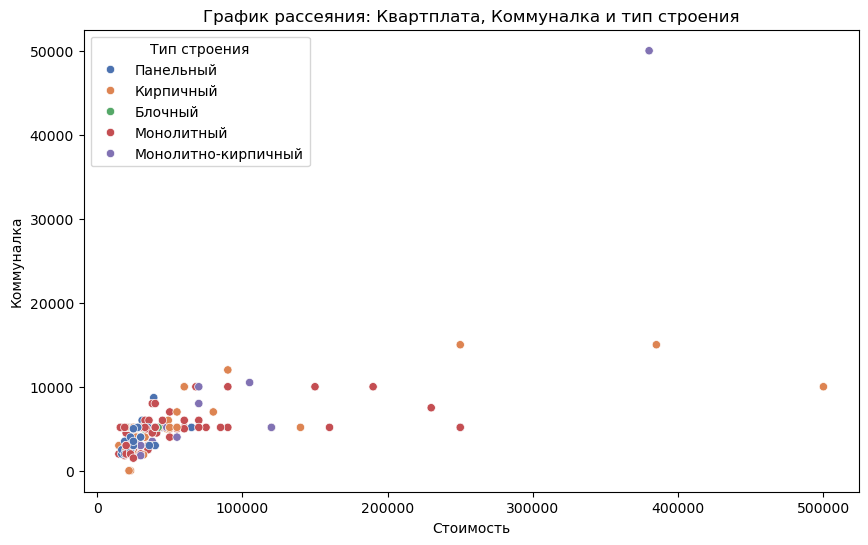

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='комм', hue='Тип строения', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, Коммуналка и тип строения')
plt.xlabel('Стоимость')
plt.ylabel('Коммуналка')
plt.legend(title='Тип строения');

## EDA Анализ

### Цели анализа:
1. ***Проанализировать город Москва***. \
Определить, какие наиболее выраженные признаки и их взаимосвязи имеет смысл отобразить. \
    1.1. `(Квартиры / Метро)`. Определить количество квартир в Москве и отобразить распределение по станциям метро \
    1.2. `(Метро / По частоте)`. Выделить список наиболее задействованных станций метро \
    1.3. `(Цена / От станции метро)`. Показать зависимость ежемесячной цены от станции метро \
    1.4. `(Цена / От количества комнат)`. Показать зависимость ежемесячной цены от количества комнат \
    1.5. `(Цена / От общей площади)`. Показать зависимость ежемесячной цены от общей площади \
    1.6. ...остальные зависимости -- это полет фантации

###  1.1. `(Квартиры / Метро)`. Определить количество квартир в Москве и отобразить распределение по станциям метро
1. Нужна только Москва. Если занчение ноль -- нет метро, квартира находится не в Москве.
2. Показать как квартиры распределены относительно `метро`

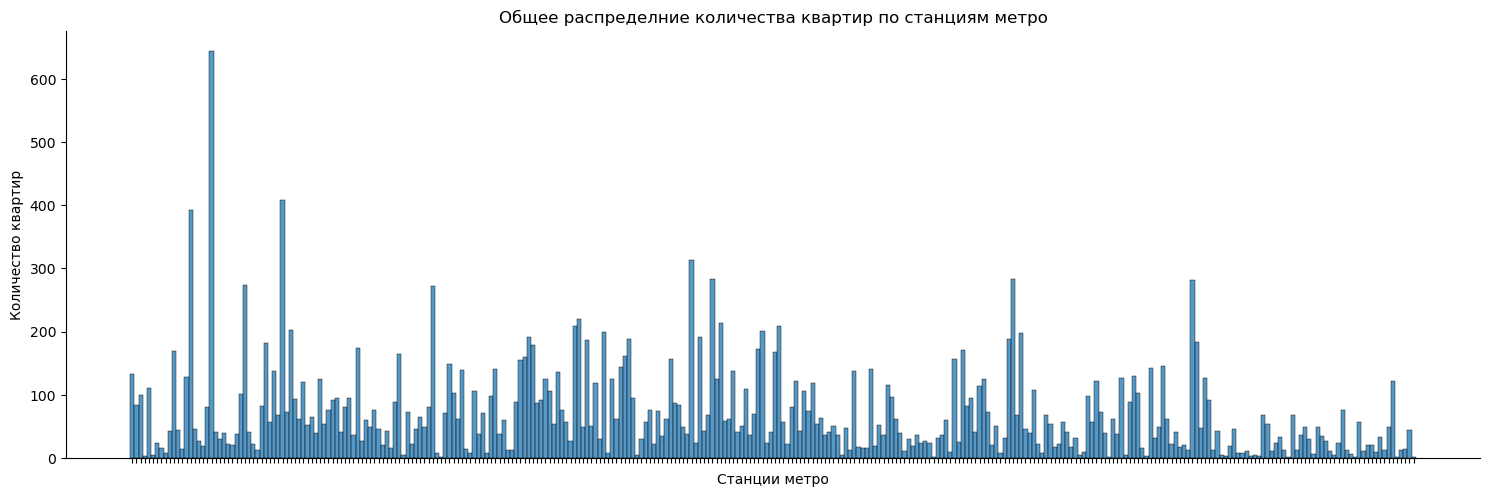

In [41]:
# Вытащить ненулевые значения
# subwaydf = pd.DataFrame()
subwaydf = fdf[fdf['Метро'] != 0]

ax = sns.displot(subwaydf, x='Метро', kind='hist', height=5, aspect=3)
plt.xticks(rotation=90);
ax.set(xticklabels=[])
ax.set_axis_labels("Станции метро", "Количество квартир")
ax.set(title='Общее распределние количества квартир по станциям метро')

- Вывод: видим, что есть станция метро, по которой количество объявлений кратно превышает количество объявлений в других районах. Эта станция метро - Проспект мира.
- - В дальнейшем исследовании определим станции метро, объявления по которым встречаются выше среднего по частоте объявлений

In [42]:
# Сгруппируем по столбцу Метро и агрегируем по количеству объявлений
mean_subways = subwaydf.copy()
mean_subways = mean_subways.groupby('Метро').agg({'ID объявления':'count'}).sort_values('ID объявления', ascending=False)
# Найдем среднее значение
num = mean_subways['ID объявления'].mean()
num

71.60064935064935

In [43]:
# Выведем только значения выше средней
mean_subways = mean_subways[mean_subways['ID объявления'] > num]
mean_subways = mean_subways.reset_index()
mean_subways

,Метро,ID объявления
0,Проспект Мира,644
1,Улица Академика Янгеля,409
2,Селигерская,393
3,Щелковская,313
4,Бабушкинская,284
...,...,...
105,Таганская,74
106,Чкаловская,73
107,Юго-Восточная,73
108,Зябликово,73


 ### 1.2. `(Метро / По частоте)`. Выделить список наиболее задействованных станций метро

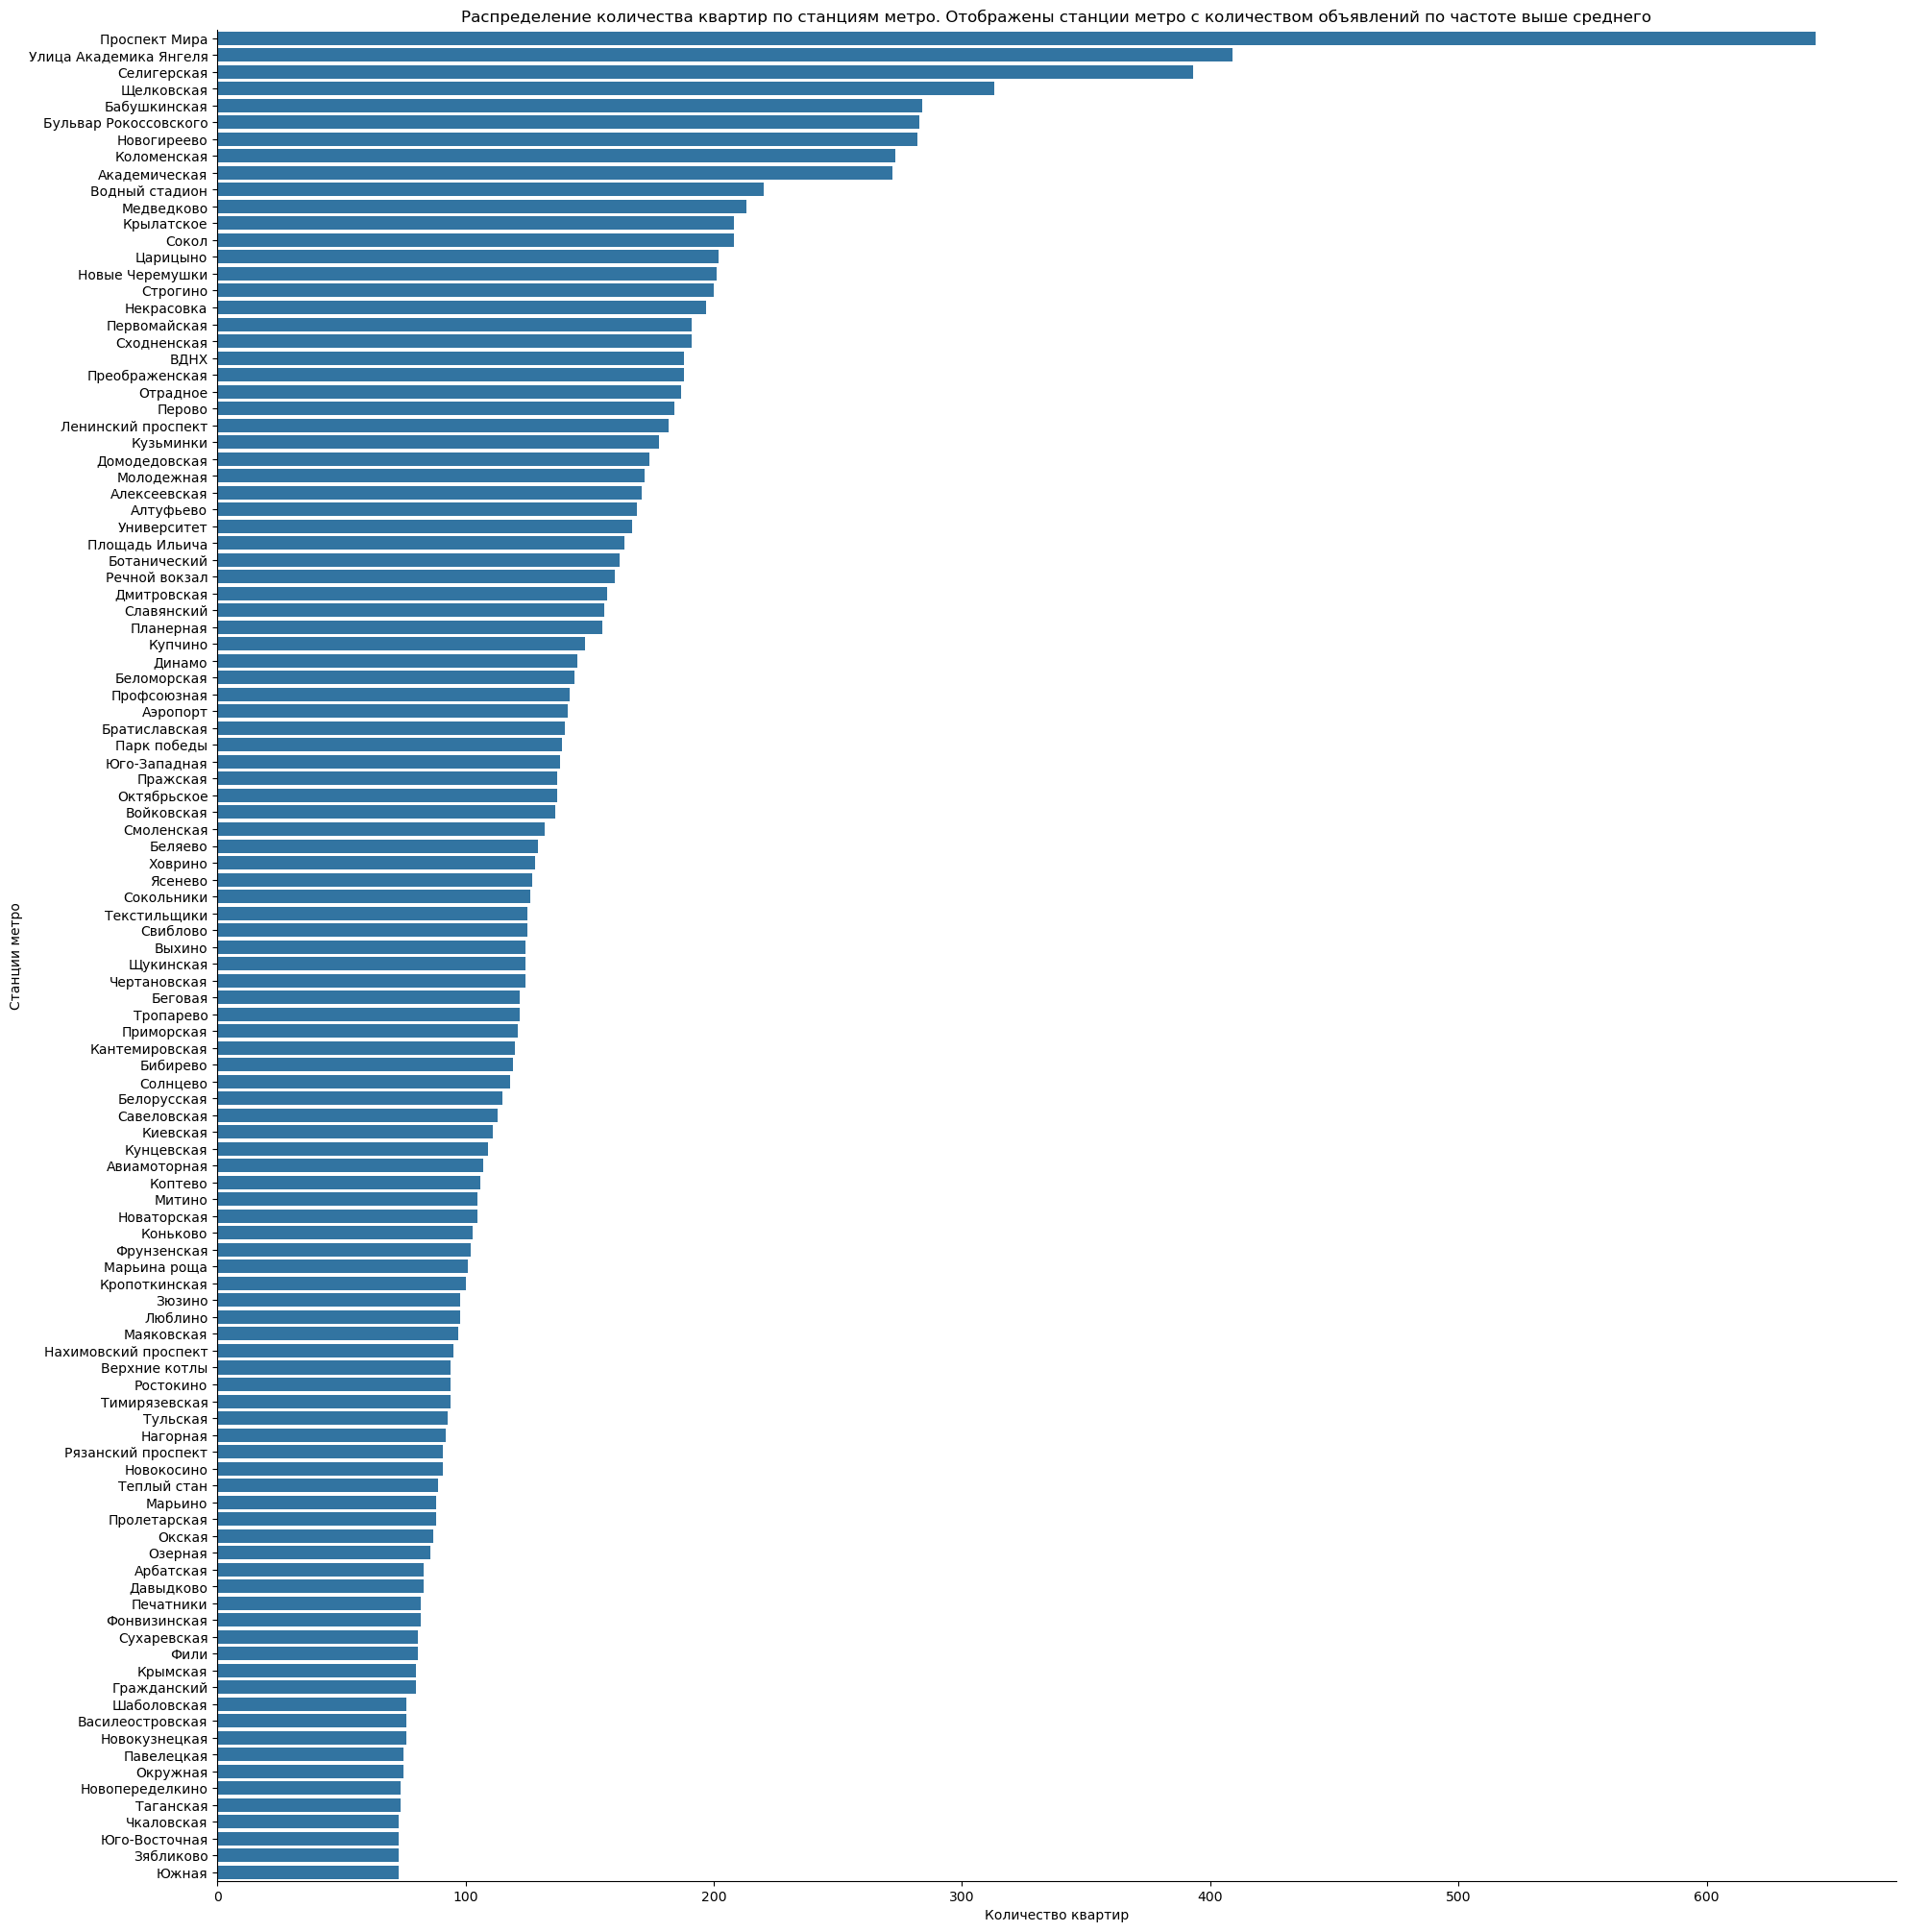

In [81]:
# Построим распределние квартир по станциям метро при количестве объявлений выше среднего
ax = sns.catplot(mean_subways, x='ID объявления', y='Метро', kind='bar', height=20, aspect=1)
plt.xticks(rotation=0);
ax.set_axis_labels("Количество квартир", "Станции метро")
ax.set(title='Распределение количества квартир по станциям метро. Отображены станции метро с количеством объявлений по частоте выше среднего')

- Вывод: видим, что наиболее часто встречаются объявления по таким станциям метро как Проспект Мира, Улица Академика Янгеля, Селигерская, Щелковская, Бабушкинская, Бульвар Рокоссовского, Новогиреево, Коломенская, Академическая.

In [45]:
# Выделим список названий метро, который будем использовать дальше
list = mean_subways['Метро'].to_list()
# Создадим новый ДФ, с учетом только интересующих нас станций метро
dfsubways = fdf[fdf['Метро'].apply(lambda x: x in list)]
# dfsubways.groupby('Метро').agg({'ID объявления':'count'}) -- проверка прошла успешно

### 1.3. `(Цена / От станции метро)`. Показать зависимость ежемесячной цены от станции метро 


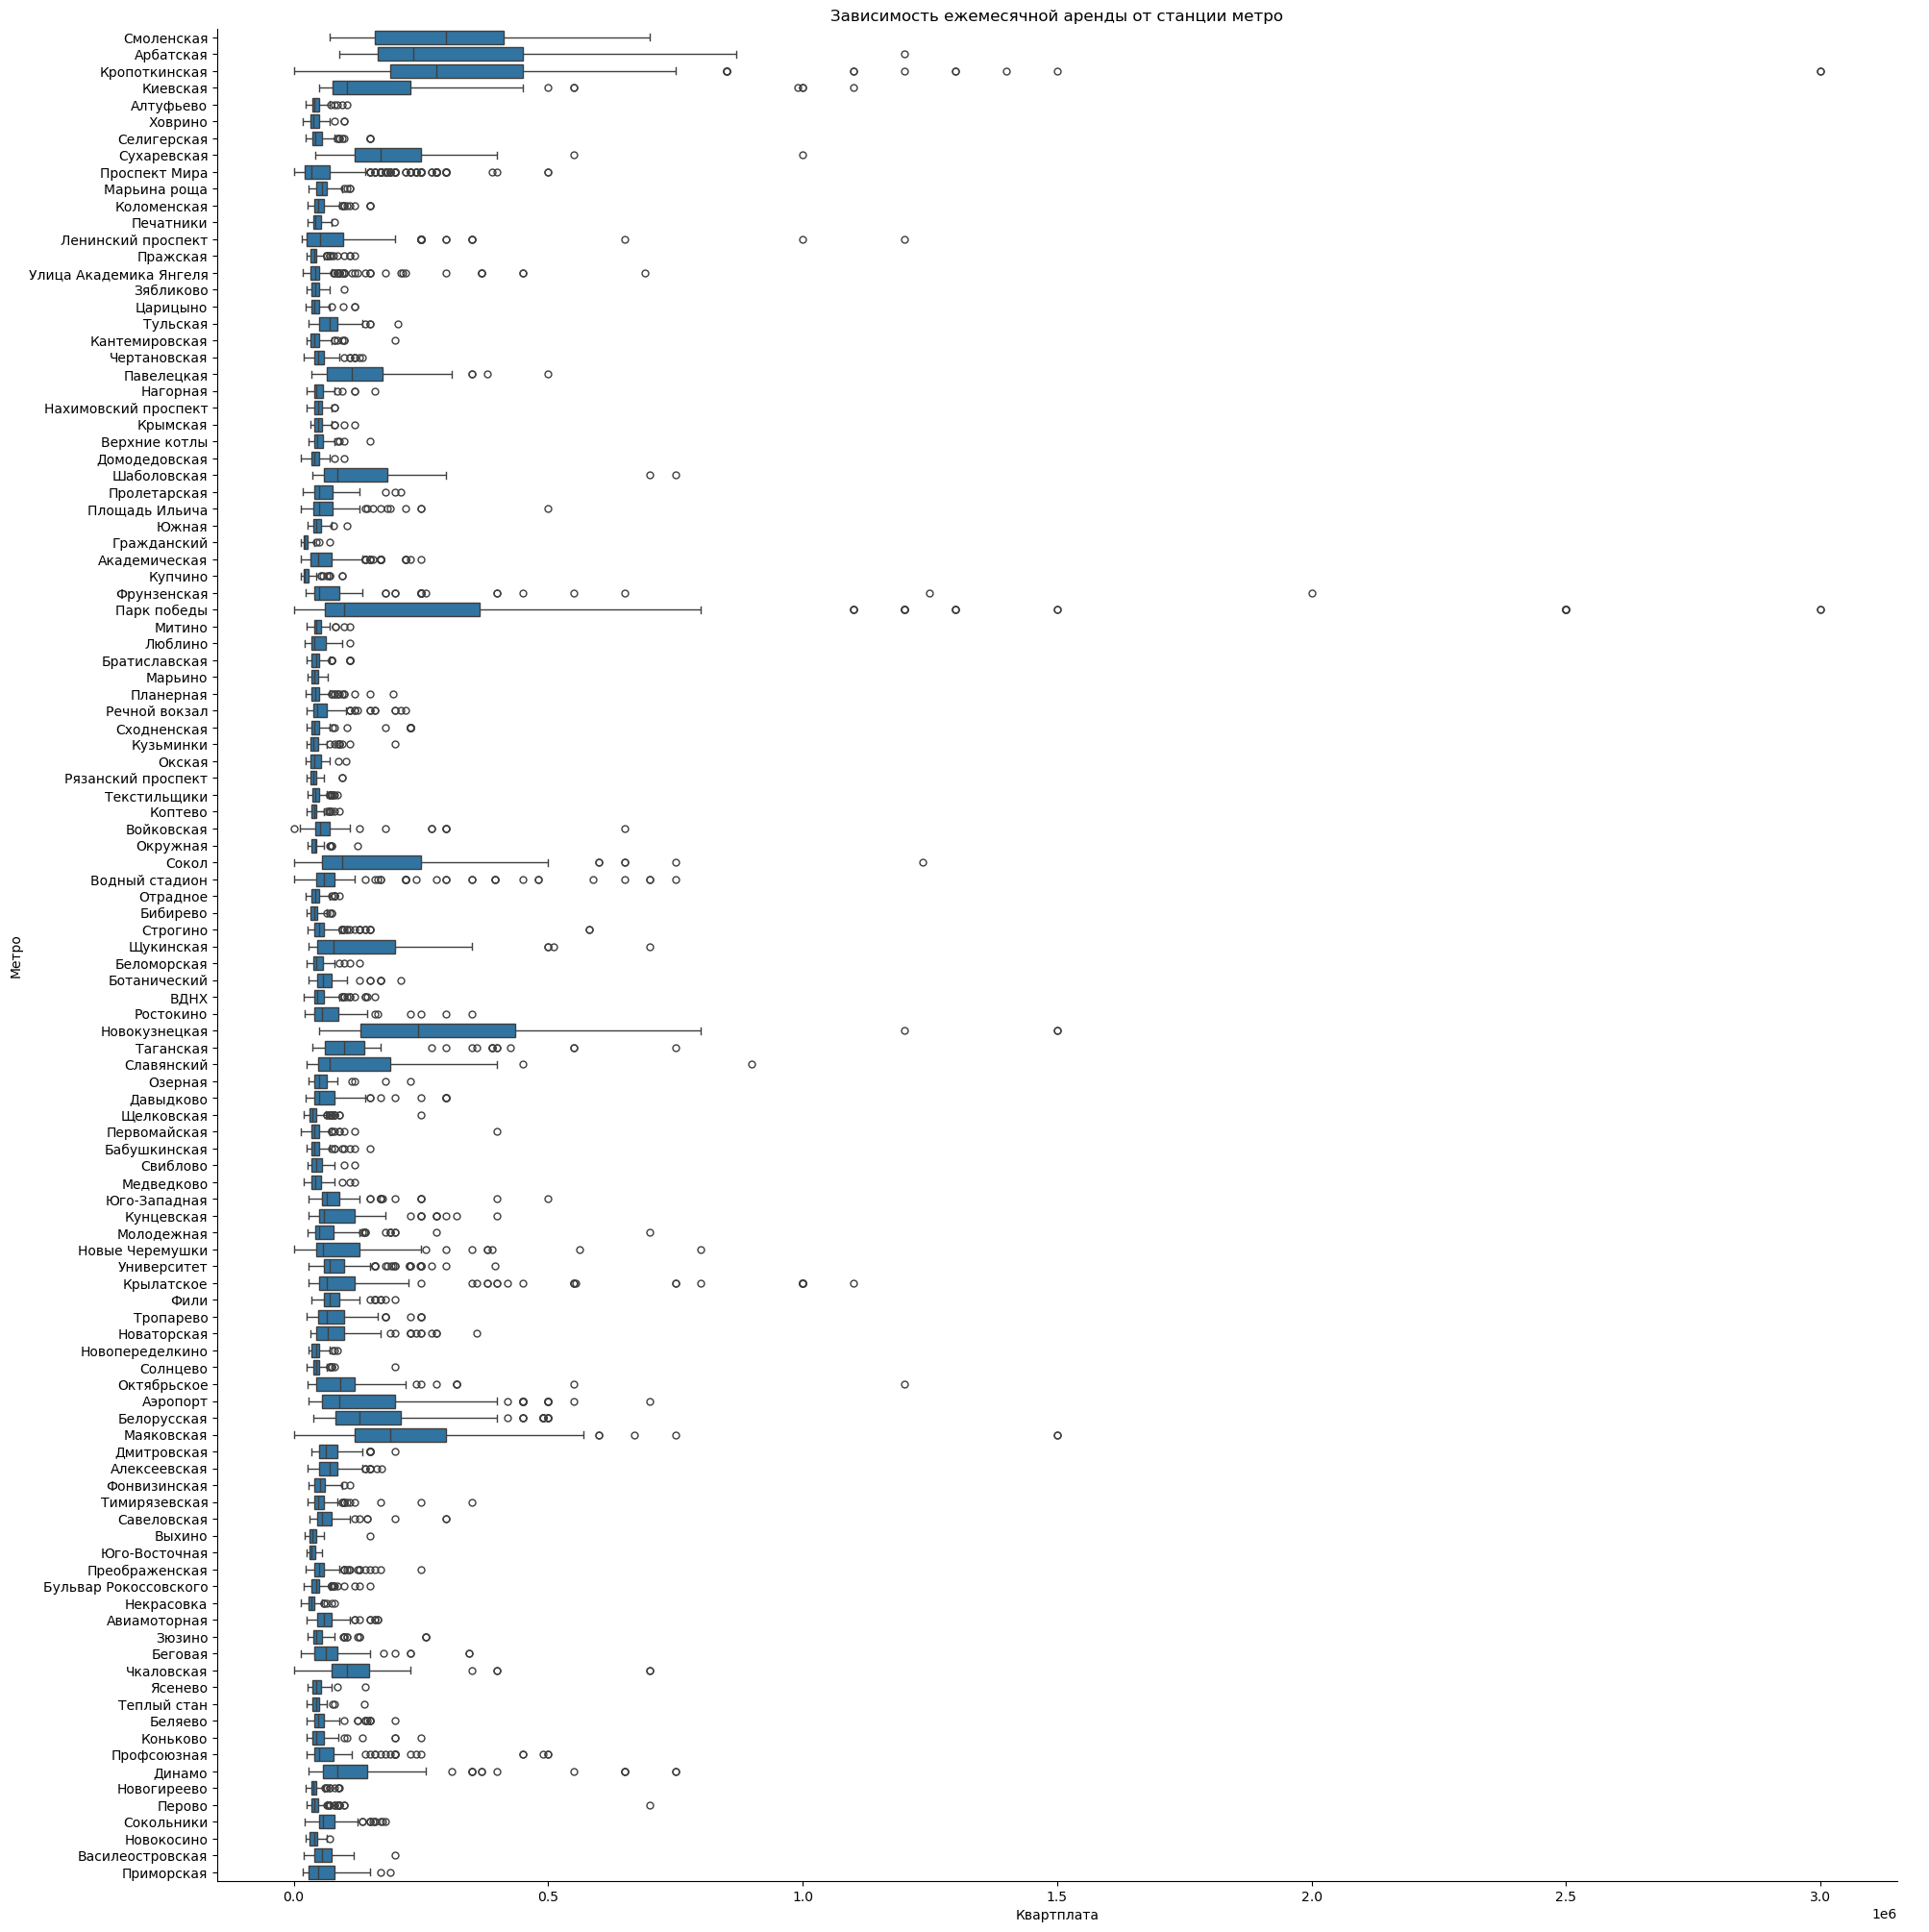

In [82]:
# ДФ с самыми частыми станциями метро
ax = sns.catplot(dfsubways, x='Квартплата', y='Метро', kind='box', height=20, aspect=1)
ax.set(title='Зависимость ежемесячной аренды от станции метро')

- Вывод: не смотря на то, что наиболее часто объявления встречаются по таким станциям метро, как Проспект Мира, Улица Академика Янгеля, Селигерская, Щелковская, Бабушкинская, Бульвар Рокоссовского, Новогиреево, Коломенская, Академическая, интересным оказалось то, что самые дорогие квартиры находятся совсем в других локациях метро.
- - Самые сильные выбросы по цене встречаются на таких станциях как: Кропоткинская, Парк победы, Новокузнецкая, Маяковская
- - Если по трём станциям еще возможно понять такие выбросы по цене (в силу расположения внутри ТТК и вблизи достопремечательностей), то Новокузнецкая вызывает вопросы.

### 1.4. `(Цена / От количества комнат)`. Показать зависимость ежемесячной цены от количества комнат \

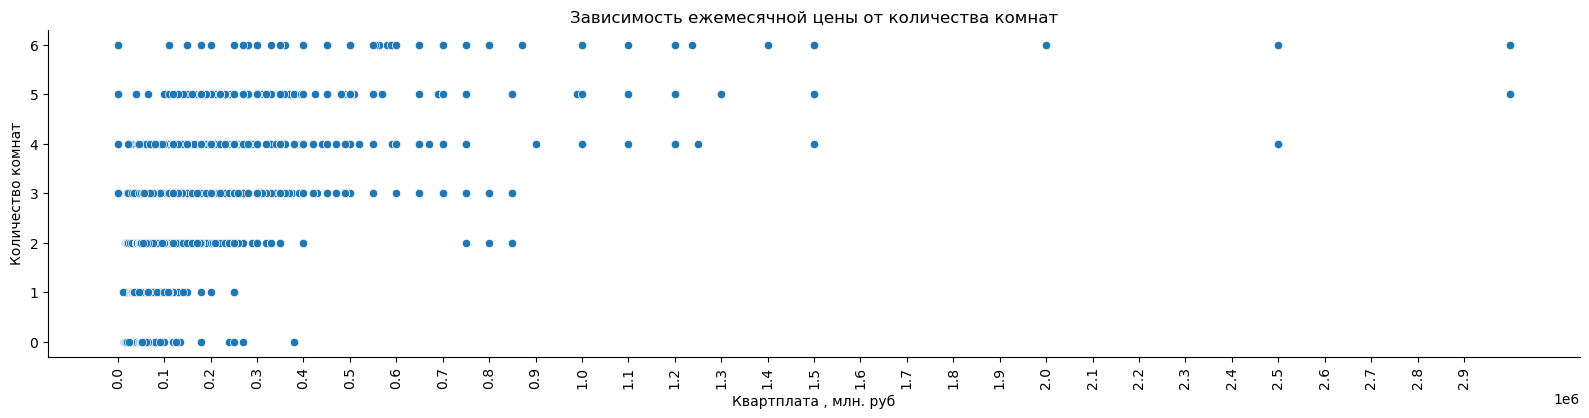

In [47]:
ax = sns.relplot(dfsubways, x='Квартплата', y='Количество комнат', kind='scatter', height=4, aspect=4)
plt.xticks(np.arange(0, 3*10**6, 100000))
plt.xlabel('Квартплата , млн. руб')
plt.xticks(rotation=90);
ax.set(title='Зависимость ежемесячной цены от количества комнат')

- Вывод: видим, что присутствуют сильные выбросы у квартир с количеством комнат 4-5-6. Говорить с редней цене за месяц по квартирам, где количество комнат 1-2-3 первично сказать трудн, поскольку наличие выбросов сильно искажает график.
- - Также явно видно, что до 5ти комнат в квартире значения в основном не превышают 600 тыс. руб.

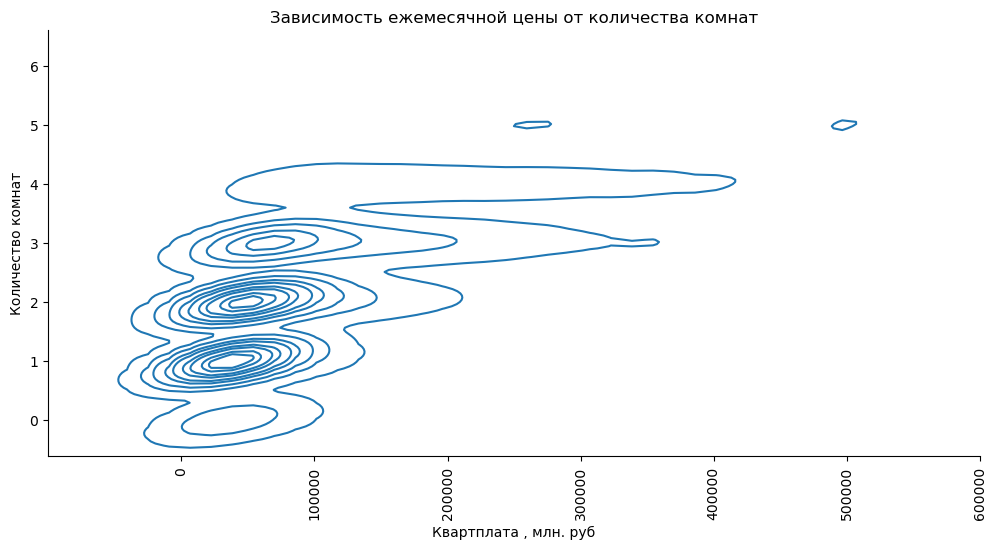

In [48]:
ax = sns.displot(dfsubways, x='Квартплата', y='Количество комнат', kind='kde', height=5, aspect=2)
plt.xticks(np.arange(0, 3*10**6, 100000))
plt.xlabel('Квартплата , млн. руб')
plt.xlim(-100000, 600000)
plt.xticks(rotation=90);
ax.set(title='Зависимость ежемесячной цены от количества комнат')

Вывод: глядя на этот график возникает ощущение, что где-то количество комнат равно 0. Рука-лицо, но мы все почистим. Это предобработка, ребзя, расслабляемся.

### 1.5. `(Цена / От общей площади)`. Показать зависимость ежемесячной цены от общей площади \

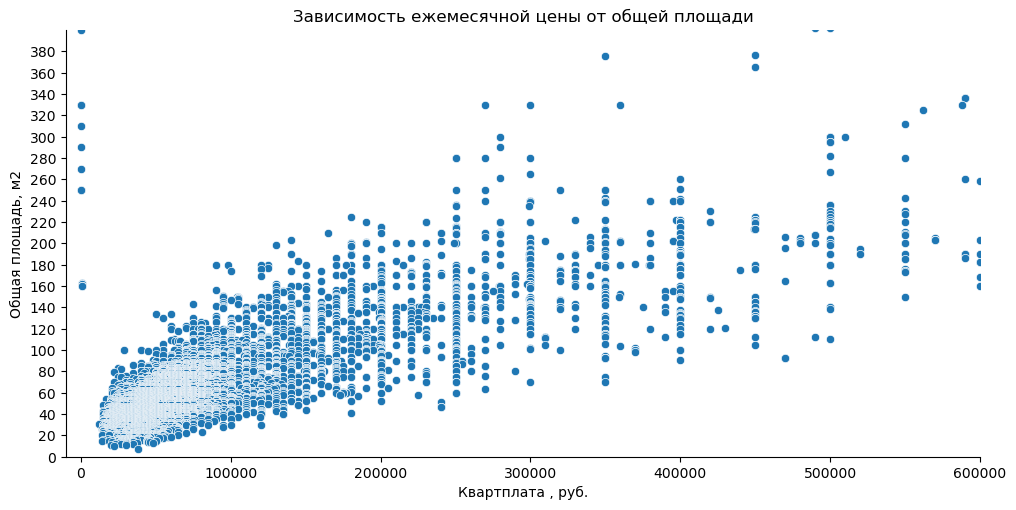

In [67]:
step_15 = dfsubways.copy()
step_15 = step_15.sort_values('Общая площадь, м2', ascending=False)
ax = sns.relplot(step_15, x='Квартплата', y='Общая площадь, м2', kind='scatter', height=5, aspect=2)
plt.xlabel('Квартплата , руб.')
plt.xlim(-10000,600000)
plt.yticks(np.arange(0, 400, 20))
plt.ylim(0, 400)
ax.set(title='Зависимость ежемесячной цены от общей площади');

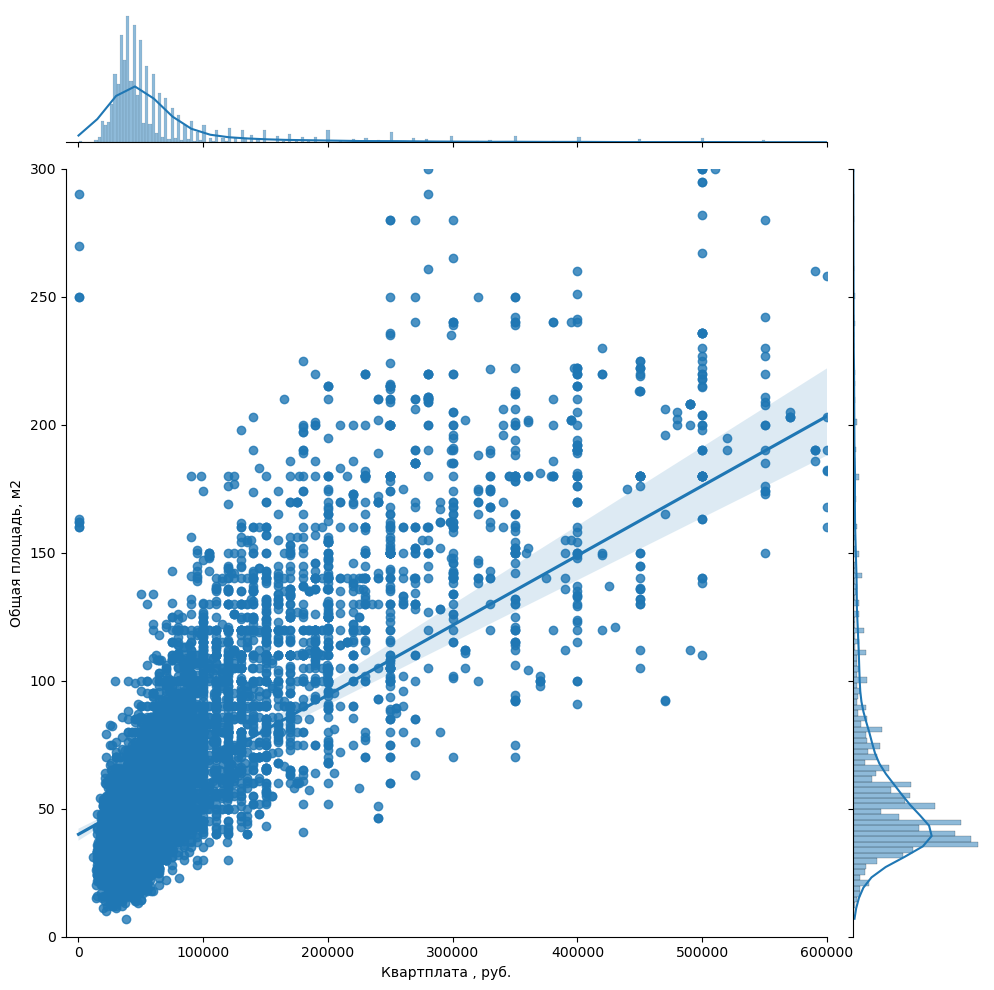

In [84]:
# Попробуем перестроить этот же график в более наглядном виде
ax = sns.jointplot(x='Квартплата', y='Общая площадь, м2', data=dfsubways, kind='reg', height=10)
plt.xlabel('Квартплата , руб.')
plt.xlim(-10000,600000)
plt.ylim(0,300);

- Вывод: основная часть квартир сконцентрирована по площади в диапазоне от 30 дл 150 м2. Ценовой разброс от 50 000 руб. до 200 000 руб.

### 1.6. `Впиши новые зависимости`. Впиши новое исследование.

In [76]:
# Тут и далее можно дальше играть с данным
# Основной рабочий датафрейм с выбранным станциями метро находится в переменной: dfsubways
dfsubways.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Квартплата,Залог,комм,Срок,Предоплата,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3,4,1,Да
1,1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3,1,1,Нет
2,2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,500000.0,500000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3,1,0,0


In [79]:
# Смотри, все колонки, где у нас числовые данные, теперь точно имеют численный тип данных либо int() либо float()
# ID объявления             15853 non-null  int64
# Количество комнат         15853 non-null  int64 
# Общая площадь, м2         15853 non-null  float64
# Площадь кухни, м2         15853 non-null  float64
# Этаж                      15853 non-null  int64
# Этажей в доме             15853 non-null  int64
# Квартплата                15853 non-null  float64
# Залог                     15853 non-null  int64
# комм                      15853 non-null  float64
# Предоплата                15853 non-null  int64
# Балкон                    15853 non-null  int64
# оджия                    15853 non-null  int64
# Санузел раздельный        15853 non-null  int64
# Лифты груз.               15853 non-null  int64
# Высота потолков также
dfsubways.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 23366
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                15853 non-null  int64  
 1   ID объявления             15853 non-null  int64  
 2   Количество комнат         15853 non-null  int64  
 3   Метро                     15853 non-null  object 
 4   Общая площадь, м2         15853 non-null  float64
 5   Площадь кухни, м2         15853 non-null  float64
 6   Этаж                      15853 non-null  int64  
 7   Этажей в доме             15853 non-null  int64  
 8   Тип строения              15853 non-null  object 
 9   Парковка                  15853 non-null  object 
 10  Квартплата                15853 non-null  float64
 11  Залог                     15853 non-null  int64  
 12  комм                      15853 non-null  float64
 13  Срок                      15853 non-null  object 
 14  Предоплата 